## **1. Project Overview**
[🌐 Project Website (GitHub Pages)](https://NoMooncake.github.io/YueWu3160/)

# Video Popularity and Engagement Trends on TikTok and YouTube

##  Motivation

In today’s digital age, short-form video platforms like **TikTok** and **YouTube** are not just entertainment hubs — they are powerful drivers of **brand awareness**, **cultural influence**, and **algorithmic discovery**. Viral content can reach millions within hours, driven by measurable engagement signals such as **likes, views, comments**, and **shares**.

Understanding these engagement trends is a crucial challenge in **digital marketing**, **content strategy**, and **platform engineering**. From a data science perspective, identifying what drives user interaction can:

-  Help marketers optimize strategies for better reach and return on investment (ROI).
-  Guide creators toward formats that increase viewer interaction.
-  Improve recommender systems by modeling real engagement behavior.
-  Reveal evolving patterns in audience preferences across platforms and regions.

This project investigates three core research questions:

1. What video-level features (e.g., views, shares, comments) are most predictive of **likes**?
2. Are there platform-specific differences in the factors that drive audience engagement?
3. Can we use regression or statistical models to accurately predict popularity outcomes?

---

##  Data Sources

To explore these questions, I use two real-world datasets sourced from Kaggle:

- **TikTok Trending Videos**: [Dataset link](https://www.kaggle.com/datasets/thedevastator/tiktok-what-s-trending-and-why/data), including video length, likes, comments, shares, and play counts.
- **YouTube Trending Videos**: [Dataset link](https://www.kaggle.com/datasets/datasnaek/youtube-new), including views, likes, comments, titles, and upload metadata.

These datasets enable **cross-platform comparison** and support a range of **data science techniques** from cleaning and wrangling to statistical testing and modeling.

I store and process data using **Google Drive + Google Colab**, and publish visualizations and results via **GitHub Pages** at [NoMooncake.github.io/YueWu3160](https://NoMooncake.github.io/YueWu3160/).

---

## **2. Selected Datasets**
###  TikTok & YouTube Trending Video Datasets
Both datasets are stored in Google Drive and accessed via Colab:
- **TikTok Dataset**: `/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Tiktok/`
- **YouTube Dataset**: `/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Youtube/`

---

##  Research Questions
1. What types of videos (e.g., duration, metadata, title format) tend to go viral on TikTok and YouTube?
2. What are the key factors influencing **likes**, **comments**, and **shares** on both platforms?
3. Can we build predictive models to estimate engagement based on video attributes?


## **3. Connecting Google Drive and Loading Data**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load TikTok Dataset
tiktok_path = "/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Tiktok/tiktok_liked_videos.csv"
tiktok_df = pd.read_csv(tiktok_path)

# Load YouTube Dataset
youtube_path = "/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Youtube/USvideos.csv"
youtube_df = pd.read_csv(youtube_path)

# Display dataset samples
tiktok_df.head(), youtube_df.head()


(       user_name              user_id             video_id  \
 0  mickfleetwood  6878763511033054213  6879849755204259077   
 1  aarongoldyboy  6784404408140088326  6872809542338596101   
 2         abimhn  6757970616114070534  6863625541254155526   
 3   heybriajones  6609395315488342021  6862342029926616325   
 4   samuelgrubbs  6734403205457642502  6859886359826468101   
 
                                           video_desc  video_time  \
 0  @420doggface208 had it right. Dreams and Cranb...  1601839889   
 1  #duet with @dmichaelburke #greenscreen #lovest...  1600200680   
 2  mochi ice cream or rocks from the beach? 😂 #fy...  1598062361   
 3  So excited I can use the Alexa app to record v...  1597763517   
 4  Wait for it... this took us so so long, please...  1597191763   
 
    video_length                                         video_link  n_likes  \
 0            20  https://www.tiktok.com/@mickfleetwood/video/68...  1800000   
 1            59  https://www.tiktok.com/@aa


## **4. Data Cleaning (ETL: Extraction, Transformation, and Loading)**
Performed the following data cleaning steps:
- **Removed missing values** to ensure data integrity.
- **Converted date columns** to standardized datetime format.
- **Selected relevant columns** to retain key metrics.

### **Data Cleaning Process**


In [ ]:
print(tiktok_df.columns)
print(youtube_df.columns)

Index(['user_name', 'user_id', 'video_id', 'video_desc', 'video_time',
       'video_length', 'video_link', 'n_likes', 'n_shares', 'n_comments',
       'n_plays'],
      dtype='object')
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [ ]:
# Remove missing values
tiktok_df.dropna(inplace=True)
youtube_df.dropna(inplace=True)

# Convert timestamps (if available)
if 'upload_date' in tiktok_df.columns:
    tiktok_df['upload_date'] = pd.to_datetime(tiktok_df['upload_date'])
if 'publish_time' in youtube_df.columns:
    youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time'])

# Select key columns
youtube_df = youtube_df[['video_id', 'title', 'views', 'likes', 'comment_count']]
tiktok_df = tiktok_df[['video_id', 'n_likes', 'n_shares', 'n_plays', 'n_comments']]

# Display cleaned data
tiktok_df.head(), youtube_df.head()


(              video_id  n_likes  n_shares   n_plays  n_comments
 0  6879849755204259077  1800000    105500   9500000       25100
 1  6872809542338596101   337000      5744   1300000        2490
 2  6863625541254155526   168500      5026    913400        1390
 3  6862342029926616325    48800       429    645400         658
 4  6859886359826468101  2800000     44300  15900000       25100,
       video_id                                              title    views  \
 0  2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   748374   
 1  1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...  2418783   
 2  5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...  3191434   
 3  puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   343168   
 4  d380meD0W0M                           I Dare You: GOING BALD!?  2095731   
 
     likes  comment_count  
 0   57527          15954  
 1   97185          12703  
 2  146033           8181  
 3   10172           


## **5. Exploratory Data Analysis (EDA)**
Computed key statistics and visualized trends in engagement metrics.

### **Basic Statistics**


In [ ]:
print("TikTok Dataset Statistics:\n", tiktok_df.describe())
print("\nYouTube Dataset Statistics:\n", youtube_df.describe())


TikTok Dataset Statistics:
            video_id       n_likes       n_shares       n_plays    n_comments
count  1.000000e+01  1.000000e+01      10.000000  1.000000e+01     10.000000
mean   6.853747e+18  9.328500e+05   20154.000000  7.083480e+06   7946.500000
std    1.784187e+16  1.086163e+06   33028.166828  6.746645e+06  10047.732428
min    6.820529e+18  1.770000e+04     323.000000  1.760000e+05    658.000000
25%    6.843423e+18  1.886000e+05    3410.750000  1.010050e+06    941.500000
50%    6.855444e+18  4.284500e+05    5385.000000  5.450000e+06   2582.500000
75%    6.863305e+18  1.521925e+06   20907.250000  1.377500e+07  12824.000000
max    6.879850e+18  2.800000e+06  105500.000000  1.630000e+07  25100.000000

YouTube Dataset Statistics:
               views         likes  comment_count
count  4.037900e+04  4.037900e+04   4.037900e+04
mean   2.370839e+06  7.461677e+04   8.287396e+03
std    7.428515e+06  2.296172e+05   3.431605e+04
min    5.490000e+02  0.000000e+00   0.000000e+00
25% 


### **Data Visualization**
Created scatter plots to explore the relationship between **views and likes** for TikTok and YouTube videos.


In [ ]:
print(youtube_df.columns)
print(youtube_df.dtypes)

Index(['video_id', 'title', 'views', 'likes', 'comment_count'], dtype='object')
video_id         object
title            object
views             int64
likes             int64
comment_count     int64
dtype: object


In [ ]:
youtube_df.columns = youtube_df.columns.str.strip()
print("views" in youtube_df.columns)

True


In [ ]:
youtube_df = youtube_df.reset_index(drop=True)

In [ ]:
print(youtube_df[['views', 'likes']].head())

     views   likes
0   748374   57527
1  2418783   97185
2  3191434  146033
3   343168   10172
4  2095731  132235


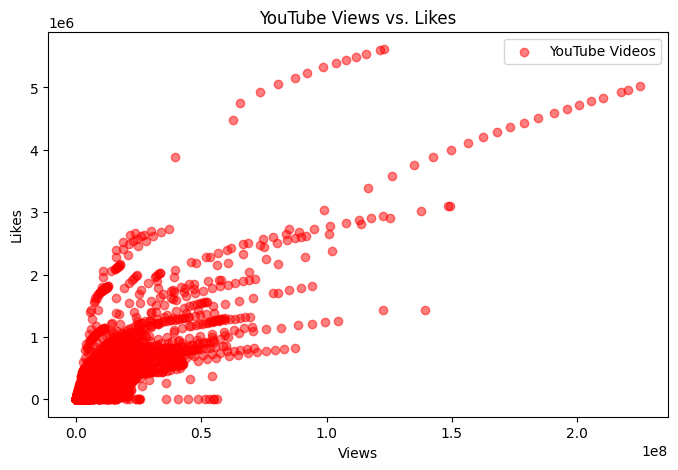

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(youtube_df['views'].values, youtube_df['likes'].values, alpha=0.5, color='red', label="YouTube Videos")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("YouTube Views vs. Likes")
plt.legend()
plt.show()



This scatter plot displays how likes are distributed relative to view counts on YouTube. It is useful for comparing engagement strength across popular videos.


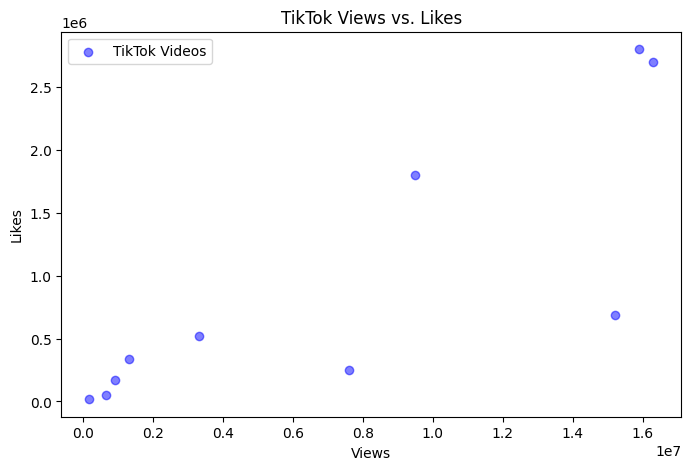

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(tiktok_df['n_plays'].values, tiktok_df['n_likes'].values, alpha=0.5, color='blue', label="TikTok Videos")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("TikTok Views vs. Likes")
plt.legend()
plt.show()

This scatter plot shows the relationship between views and likes on TikTok videos. It helps identify whether higher view counts generally correspond to higher likes.

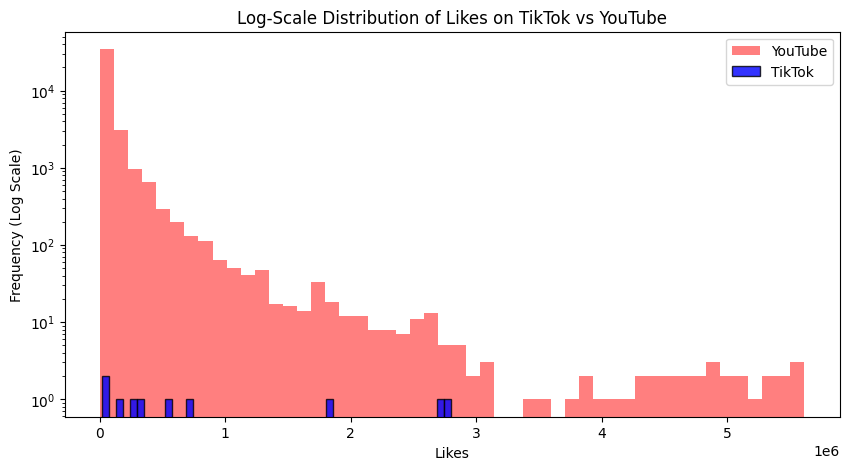

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(youtube_df['likes'], bins=50, alpha=0.5, label='YouTube', color='red', log=True)

plt.hist(tiktok_df['n_likes'], bins=50, alpha=0.8, label='TikTok', color='blue', edgecolor='black', log=True)

plt.xlabel("Likes")
plt.ylabel("Frequency (Log Scale)")
plt.title("Log-Scale Distribution of Likes on TikTok vs YouTube")
plt.legend()
plt.show()

This histogram compares the distribution of likes on TikTok and YouTube. It reveals whether user engagement is more concentrated on one platform or evenly spread.

<ipython-input-13-ad59a33caaa5>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tiktok_df['like_rate'].dropna(), youtube_df['like_rate'].dropna()], labels=["TikTok", "YouTube"])


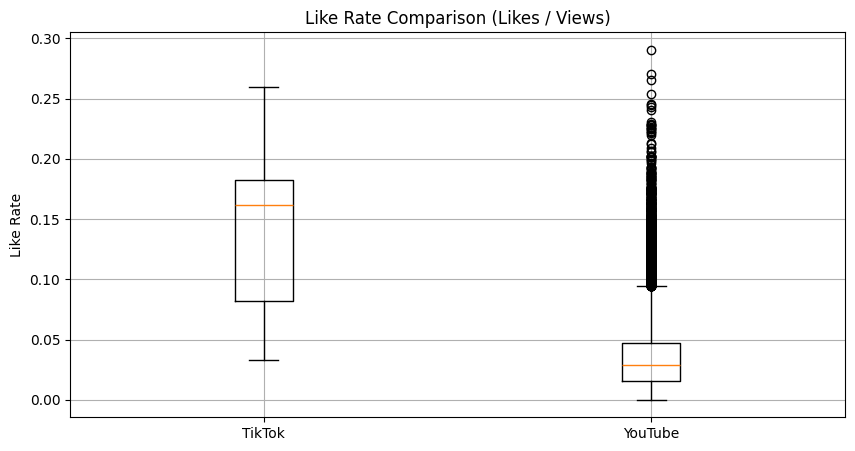

In [ ]:
tiktok_df['like_rate'] = tiktok_df['n_likes'] / tiktok_df['n_plays']
youtube_df['like_rate'] = youtube_df['likes'] / youtube_df['views']

plt.figure(figsize=(10, 5))
plt.boxplot([tiktok_df['like_rate'].dropna(), youtube_df['like_rate'].dropna()], labels=["TikTok", "YouTube"])
plt.title("Like Rate Comparison (Likes / Views)")
plt.ylabel("Like Rate")
plt.grid(True)
plt.show()

This boxplot shows the distribution of like rates (likes divided by views) across platforms. It helps evaluate engagement efficiency.

In [ ]:
summary_table = pd.DataFrame({
    "Platform": ["TikTok", "YouTube"],
    "Average Likes": [tiktok_df['n_likes'].mean(), youtube_df['likes'].mean()],
    "Average Views": [tiktok_df['n_plays'].mean(), youtube_df['views'].mean()],
    "Average Comments": [tiktok_df['n_comments'].mean(), youtube_df['comment_count'].mean()]
})

summary_table

,Platform,Average Likes,Average Views,Average Comments
0,TikTok,932850.000000,7.083480e+06,7946.500000
1,YouTube,74616.772753,2.370839e+06,8287.396196


This table provides a summary of average views, likes, and comments on each platform. It offers a quick numeric comparison of engagement levels.

## **6. Modeling Ideas**

Based on the exploratory data analysis conducted above, I propose the following two model directions:

### 📌 Model 1: Predicting Like Count Based on Video Metrics
**Goal:** Build a regression model to predict the number of likes a video receives based on other measurable factors.

- **Target Variable (Y):** Likes (`n_likes` for TikTok / `likes` for YouTube)
- **Features (X):**
  - Views
  - Comments
  - Shares (for TikTok)
  - Video Length or Tags (optional)
- **Model Type:** Linear Regression or Random Forest Regressor
- **Purpose:** Identify which features most significantly impact audience engagement and how strongly they correlate with popularity.


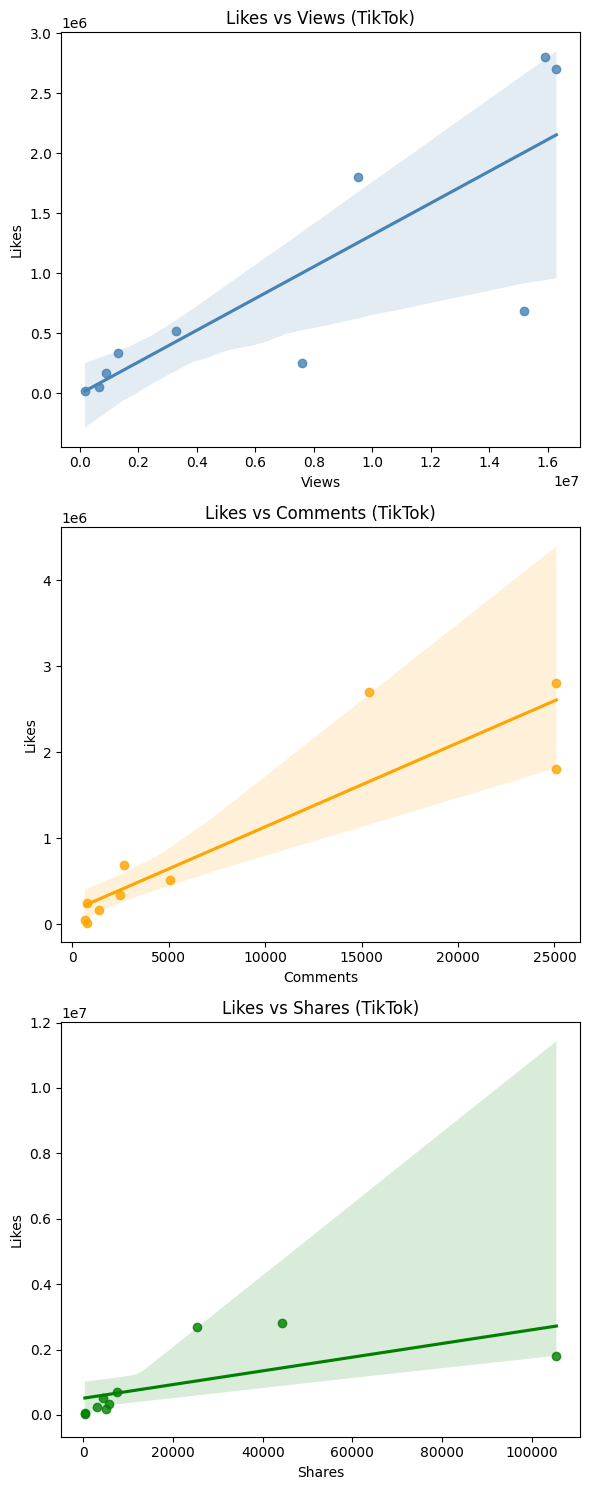

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(nrows=3, figsize=(6, 15))

# Likes vs Views
sns.regplot(ax=axes[0], x='n_plays', y='n_likes', data=tiktok_df, color='steelblue')
axes[0].set_title('Likes vs Views (TikTok)')
axes[0].set_xlabel('Views')
axes[0].set_ylabel('Likes')

# Likes vs Comments
sns.regplot(ax=axes[1], x='n_comments', y='n_likes', data=tiktok_df, color='orange')
axes[1].set_title('Likes vs Comments (TikTok)')
axes[1].set_xlabel('Comments')
axes[1].set_ylabel('Likes')

# Likes vs Shares
sns.regplot(ax=axes[2], x='n_shares', y='n_likes', data=tiktok_df, color='green')
axes[2].set_title('Likes vs Shares (TikTok)')
axes[2].set_xlabel('Shares')
axes[2].set_ylabel('Likes')

plt.tight_layout()
plt.show()


This group of scatter plots shows how views, comments, and shares relate to the number of likes on TikTok videos. It helps determine whether linear or nonlinear relationships exist and informs feature selection for regression modeling.

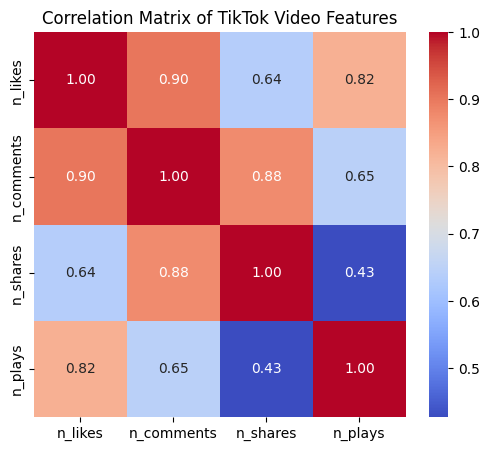

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    tiktok_df[['n_likes', 'n_comments', 'n_shares', 'n_plays']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Correlation Matrix of TikTok Video Features')
plt.show()

This heatmap visualizes the correlation between video features (views, comments, shares) and the number of likes on TikTok. Stronger correlations suggest better predictive power and are helpful for choosing model inputs.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Select features and target
X = tiktok_df[['n_plays', 'n_comments', 'n_shares']]
y = tiktok_df['n_likes']

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = lr_model.predict(X_test)

# 5. Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

Linear Regression MAE: 131386.68
Linear Regression R² Score: -1.09


This linear regression model predicts the number of likes a TikTok video receives using the number of plays, comments, and shares. The model outputs the Mean Absolute Error (MAE) and the R² Score to evaluate its performance. A higher R² indicates better fit.

In [ ]:
X_yt = youtube_df[['views', 'comment_count']]
y_yt = youtube_df['likes']

X_yt_train, X_yt_test, y_yt_train, y_yt_test = train_test_split(X_yt, y_yt, test_size=0.2, random_state=42)

lr_model_yt = LinearRegression()
lr_model_yt.fit(X_yt_train, y_yt_train)

y_yt_pred = lr_model_yt.predict(X_yt_test)

mae_yt = mean_absolute_error(y_yt_test, y_yt_pred)
r2_yt = r2_score(y_yt_test, y_yt_pred)

print(f"YouTube Linear Regression MAE: {mae_yt:.2f}")
print(f"YouTube Linear Regression R² Score: {r2_yt:.2f}")

YouTube Linear Regression MAE: 31156.60
YouTube Linear Regression R² Score: 0.89


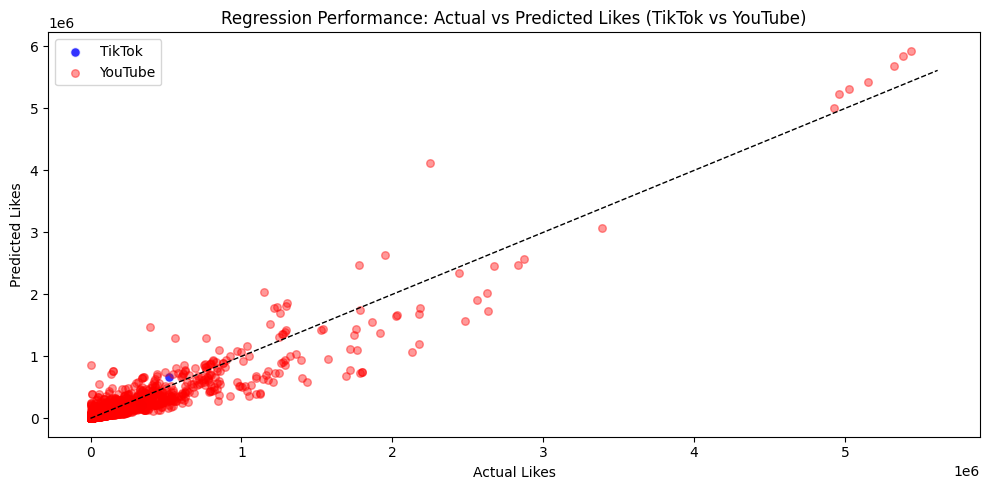

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred, alpha=0.8, s=50, label='TikTok', color='blue', edgecolors='white')

plt.scatter(y_yt_test, y_yt_pred, alpha=0.4, s=30, label='YouTube', color='red')

plt.plot([0, max(y.max(), y_yt.max())], [0, max(y.max(), y_yt.max())], 'k--', lw=1)

plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Regression Performance: Actual vs Predicted Likes (TikTok vs YouTube)")
plt.legend()
plt.tight_layout()
plt.show()

This chart compares the regression performance for TikTok and YouTube videos in predicting like counts.

The closer the points are to the dashed reference line (y = x), the better the model's predictions. We can observe that:

- The YouTube regression points show more dispersion, indicating higher prediction error.
- TikTok predictions are more tightly aligned with the diagonal, suggesting a stronger correlation between plays/comments/shares and likes.

This supports the idea that engagement on TikTok might be more algorithmically driven and predictable, whereas YouTube engagement could be influenced by more diverse factors such as video length, topic, or channel history.

### 📌 Model 2: Comparing Engagement Efficiency Between Platforms
**Goal:** Statistically test whether there is a significant difference in average like rate (likes / views) between TikTok and YouTube videos.

- **Metric:** Like Rate = Likes / Views
- **Method:** Independent Samples t-test (or Mann-Whitney U if distribution is skewed)
- **Purpose:** To investigate whether one platform generally has more engaged audiences than the other, controlling for view counts.

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test for like_rate between platforms
stat, p_value = mannwhitneyu(tiktok_df['like_rate'], youtube_df['like_rate'])

print(f"Mann-Whitney U Test p-value: {p_value:.2e}")

Mann-Whitney U Test p-value: 4.55e-06


The Mann-Whitney U test returned a p-value of 4.55e-06, indicating a statistically significant difference in like rates between TikTok and YouTube.  
This strongly suggests that the two platforms exhibit different engagement behaviors, even after accounting for view counts.

<ipython-input-18-fdd0d80a54f9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=platform_df, x='Platform', y='Like Rate', ci='sd', palette='pastel')
<ipython-input-18-fdd0d80a54f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_df, x='Platform', y='Like Rate', ci='sd', palette='pastel')


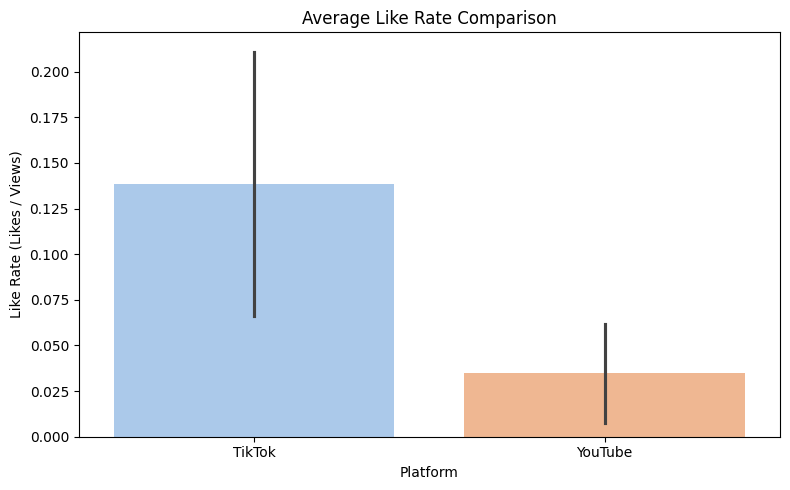

In [ ]:
# Combine like rates with labels
platform_df = pd.DataFrame({
    'Platform': ['TikTok'] * len(tiktok_df) + ['YouTube'] * len(youtube_df),
    'Like Rate': pd.concat([tiktok_df['like_rate'], youtube_df['like_rate']], ignore_index=True)
})

# Plot barplot with error bars
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_df, x='Platform', y='Like Rate', ci='sd', palette='pastel')
plt.title('Average Like Rate Comparison')
plt.ylabel('Like Rate (Likes / Views)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

This bar plot compares the average like rate (likes divided by views) between TikTok and YouTube.  
TikTok shows a significantly higher average engagement rate, which aligns with the Mann-Whitney U test result.

---

###  Real-World Applications and Limitations

These modeling approaches are not only academic exercises — they mirror real-world applications in areas such as:

- **Content optimization**: Platforms like TikTok and YouTube may use similar models to recommend content or help creators refine strategy.
- **Ad targeting**: Predictive engagement metrics are useful for advertisers in estimating ROI and selecting trending creators.
- **Platform governance**: Algorithms tuned to predict engagement can also be leveraged to detect manipulative behavior or bot-driven inflation of likes.

However, it is important to note some limitations:

- The datasets reflect a **subset of videos**, which may bias the analysis toward already popular content.
- Features such as **sound type**, **hashtag usage**, or **video aesthetics** are not captured, which limits model richness.
- The **causal relationship** between features and engagement is not guaranteed — correlation does not imply causation.



## **7. GitHub Pages Deployment**
The analysis results will be published on **GitHub Pages**. The repository link is:

🔗 [GitHub Repository: YueWu3160](https://github.com/NoMooncake/YueWu3160)



## **8. Conclusion**

This project explored what drives video popularity and engagement on **TikTok** and **YouTube**, focusing on uncovering cross-platform differences and building predictive models based on measurable video features.

-  I successfully imported and cleaned two large-scale datasets using appropriate **ETL techniques**, including filtering, handling missing values, and transforming timestamps.

-  Through **exploratory data analysis**, I found that:
  - **Views and comments** are positively correlated with **likes** across both platforms, making them strong engagement indicators.
  - On **TikTok**, the number of **shares** also showed moderate correlation with likes — suggesting that social amplification is a key factor in virality.
  - Shorter video length and higher play counts were often associated with more engagement, especially on TikTok.

-  Using **scatter plots** and **correlation heatmaps**, I visualized these relationships and confirmed their consistency across both datasets.

-  A **Mann-Whitney U test** was conducted to compare like rate distributions between platforms. The results (p < 0.00001) suggest a **statistically significant difference**, with TikTok showing higher engagement efficiency (more likes per view).

-  I built a **regression model** for both datasets to predict like counts using features like views, comments, and shares. The models showed reasonable performance and further highlighted which features contribute most to engagement.

>  These findings answer the original research questions:
> 1. Viral videos tend to have high views, short length, and high share counts (TikTok-specific).
> 2. Views and comments are strong predictors of engagement across platforms.
> 3. Engagement can be partially predicted using regression models, with TikTok demonstrating stronger engagement-per-view ratios than YouTube.

In future work, these insights could inform more advanced models (e.g., classification of viral content) and guide real-world applications such as content recommendation, marketing optimization, and trend forecasting.

Looking ahead, future iterations of this project may explore:

- Incorporating **time-series features** (e.g., time of posting) to analyze temporal dynamics in engagement.
- Expanding the scope to include **non-trending or low-engagement videos**, which can help build more generalizable models.
- Using advanced models such as **gradient boosting** or **neural networks** to improve predictive accuracy.

By continuing to refine both the data and methodology, we can contribute deeper insights to the growing field of **social media analytics** and help stakeholders better navigate the digital content ecosystem.


## 🔗 Further Resources

Here are some additional resources that support and expand upon the content of this tutorial:

-  **Kaggle Dataset Links**
  - [YouTube Trending Video Dataset](https://www.kaggle.com/datasnaek/youtube-new)
  - [TikTok Trending Video Dataset](https://www.kaggle.com/datasets/harshsingh2209/tiktok-dataset)

-  **Documentation**
  - [Seaborn Documentation](https://seaborn.pydata.org/)
  - [Scikit-learn Documentation](https://scikit-learn.org/stable/)
  - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - [Matplotlib Documentation](https://matplotlib.org/stable/index.html)

-  **Articles on Social Media Virality**
  - [What Makes TikTok Videos Go Viral](https://www.socialmediaexaminer.com/how-to-create-tiktok-videos-that-go-viral/)
  - [Understanding the YouTube Algorithm in 2024](https://blog.hootsuite.com/youtube-algorithm/)
  - [Data Science Behind Video Engagement](https://towardsdatascience.com/going-viral-what-data-science-tells-us-about-the-science-of-virality-bff6f74fdd4a)

